In [1]:
# import library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#Example
#Dataset
#https://raw.githubusercontent.com/adminho/machine-learning/master/Datasets/forest_fires.csv
df = pd.read_csv("https://raw.githubusercontent.com/adminho/machine-learning/master/Datasets/forest_fires.csv")
df

,Temperature,Humidity,Fires
0,22.8,40,No
1,29.6,27,Yes
2,17.8,51,No
3,19.3,38,No
4,28.6,27,Yes
5,17.8,56,Yes
6,17.7,25,Yes
7,18.2,46,Yes
8,25.1,27,No
9,30.2,24,No


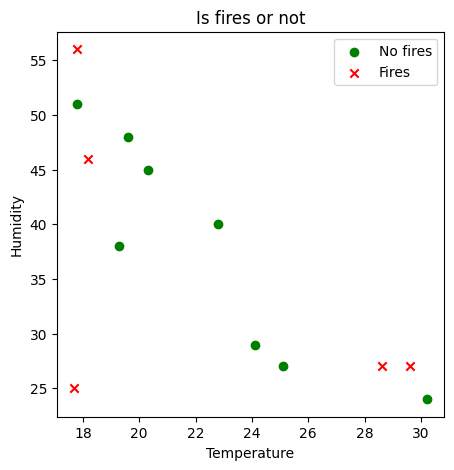

In [3]:
#plot results
GroupNo = df[df['Fires']=='No']
GroupYes = df[df['Fires']=='Yes']
plt.figure(figsize=(5,5))
plt.title("Is fires or not")
plt.scatter(GroupNo['Temperature'],GroupNo['Humidity'],color='green',marker = 'o',label='No fires')
plt.scatter(GroupYes['Temperature'],GroupYes['Humidity'],color='red',marker = 'x',label='Fires')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.legend(loc='upper right')
plt.show()

In [7]:
#import machine learning library
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
model_knn = knn.fit(df[['Temperature','Humidity']],df['Fires'])

In [5]:
#New data
new_temperature = 25.1 
new_humidity = 33

answer = model_knn.predict([[new_temperature,new_humidity]])
print("The answer is",answer[0])

The answer is No


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [6]:
answer

array(['No'], dtype=object)

In [7]:
#Calcutate distance

def get_distance(X,Y,x_point,y_point):
  return np.sort(np.sqrt((X-x_point)**2 + (Y-y_point)**2))
distance = get_distance(df['Temperature'],df['Humidity'],new_temperature,new_humidity)
distance

array([ 4.12310563,  6.        ,  6.94622199,  7.36817481,  7.5       ,
        7.65767589, 10.34456379, 10.89770618, 12.92439554, 14.71767645,
       15.97654531, 19.42395428, 24.13068586])

In [8]:
model_knn.n_neighbors

3

In [9]:
distance[model_knn.n_neighbors-1]

6.946221994724902

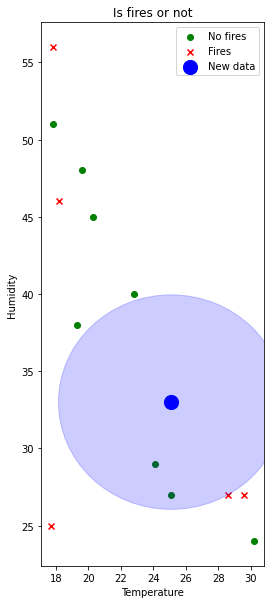

In [10]:
#Plot results
radious = distance[model_knn.n_neighbors-1]
m = 'x' if answer == 'No' else 'o'
GroupNo = df[df['Fires']=='No']
GroupYes = df[df['Fires']=='Yes']

plt.figure(figsize=(4,10))
plt.title("Is fires or not")
plt.scatter(GroupNo['Temperature'],GroupNo['Humidity'],color='green',marker = 'o',label='No fires')
plt.scatter(GroupYes['Temperature'],GroupYes['Humidity'],color='red',marker = 'x',label='Fires')

circle = plt.Circle((new_temperature,new_humidity),radious,alpha=0.2,color='b')
plt.gcf().gca().add_artist(circle)

plt.scatter(new_temperature,new_humidity,s=200,c='b',label = 'New data')

plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.legend(loc='upper right')
plt.show()